# **Optimal Portfolio Allocation 1**

An investment universe of the following risky assets with a dependence structure (correlation) applies to all questions below as relevant:



$$
\begin{array}{cccc}
\text{Asset} & \mu & \sigma & w \\
\hline
A & 0.02 & 0.05 & w_1 \\
B & 0.07 & 0.12 & w_2 \\
C & 0.15 & 0.17 & w_3 \\
D & 0.20 & 0.25 & w_4
\end{array}
$$

$$
R = \begin{pmatrix}
1 & 0.3 & 0.3 & 0.3 \\
0.3 & 1 & 0.6 & 0.6 \\
0.3 & 0.6 & 1 & 0.6 \\
0.3 & 0.6 & 0.6 & 1
\end{pmatrix}
$$

## Question 1.1. Consider the min variance portfolio with a target return $m$

$$ \underset{w}{\text{argmin}} \frac{1}{2}w'\Sigma w \qquad \text{s.t.} \quad w'\mathbf{1}=1 \qquad \mu_{\Pi}=w'\mu=m$$

### **Q: Formulate the Lagrangian and give its partial derivatives.**

<br>

***

<br>

**Step 1: constructing the Lagrangian equation**

Our goal is to minimize $\frac{1}{2}w'\Sigma w$, with to constraints:

(1) $w'1=1$

(2) $w'\mu=m$

Thus, we introduce two Lagrange multipliers, $\lambda$ and $\gamma$ to constructing the Lagrangian equation:


$$ \mathcal{L}(w,\lambda,\gamma) = \frac{1}{2}w'\Sigma w - \lambda(w'1-1) - \gamma(w'\mu-m) $$

Note:

- $\frac{1}{2}w'\Sigma w$ is the target that we want to minimize

- $\lambda(w'1-1)$ and $\gamma(w'\mu-m)$ are used for setting up constraint

<br>

***

<br>

**Step 2: partial derivatives on $w$**

To find the optimal w*, we calculate the partial derivative on $w$

$$ \frac{\partial \mathcal{L}}{\partial w} = \Sigma w - \lambda 1 - \gamma \mu = 0 $$

This gives us:

$$\Sigma w = \lambda 1 + \gamma \mu$$

Thus, we have a line equation for w

<br>

***

<br>

**Step 3: use $\Sigma^{-1}$ to represent w**

Assuming $\Sigma$ is reversible, we would multiply both side of the above equation with $\Sigma^{-1}$

$$w = \lambda \Sigma^{-1} 1 + \gamma \Sigma^{-1} \mu$$

<br>

***

<br>

**Step 4: using constrains to deduce $\lambda$ and $\gamma$**

We know that 

(1)$w'1=1$

substituting w:

$$(\lambda \Sigma^{-1} 1 + \gamma \Sigma^{-1} \mu)'1=1$$

With transposing and multiplication rule, we further refine this equation into:

$$\lambda (1' \Sigma^{-1} 1) + \gamma (\mu' \Sigma^{-1} 1)=1$$

We using the following convention to represent...

$A = 1' \Sigma^{-1} 1$

$B = 1' \Sigma^{-1} \mu = \mu' \Sigma^{-1} 1$ (because transposing does not affect scalar)

$C = \mu' \Sigma^{-1} \mu$

Thus, the above equation becomes:

$$\lambda A + \gamma B = 1 \tag{1}$$

(2)$w'\mu = m$

substituting w:

$$(\lambda \Sigma^{-1} 1 + \gamma \Sigma^{-1} \mu)'\mu = m$$

Further refined into:

$$\lambda (1'\Sigma^{-1} \mu) + \gamma (\mu'\Sigma^{-1} \mu) = m$$

Thus:

$$\lambda B + \gamma C = 1 \tag{2}$$

<br>

***

<br>

**Step 5: with equation (1) and (2), we solve for $\lambda$ and $\gamma$**

$$\begin{cases}
A\lambda + B\gamma = 1, \\
B\lambda + C\gamma = m.
\end{cases}$$

Solving the above two equations give us:

$$\lambda = \frac{C - Bm}{AC - B^2}, \quad \gamma = \frac{Am - B}{AC - B^2}$$

<br>

***

<br>

**Step 6: we deduce the w\***

Substituting the $\lambda$ and $\gamma$ into $w = \lambda \Sigma^{-1} 1 + \gamma \Sigma^{-1} \mu$

$$w* = \frac{C - Bm}{AC - B^2} \Sigma^{-1} 1 + \frac{Am - B}{AC - B^2} \Sigma^{-1} \mu$$

Thus, we have solved for the optimal weight w*.

<br>

***

<br>

**Step 7: calculate the risk of the portfolio $\sigma_\Pi$**

Now with w* becomes known, we can calculate the portfolio risk with

$$\sigma_\Pi = \sqrt{\mathbf{w}^* \mathbf{\Sigma} \mathbf{w}^*}$$


<br>

***

<br>

### **Q: Write down the analytical solution for $w∗$ optimal allocations – no derivation required.**

$$ w^* = \frac{C - B m}{A C - B^2} \Sigma^{-1} 1 + \frac{A m - B}{A C - B^2} \Sigma^{-1} \mu $$


<br>

***

<br>

### **Q: Compute allocations $w∗$ and portfolio risk $\sigma_{\Pi} = \sqrt{w'\Sigma w}$ for $m$ = 4.5%.**

In [1]:
import numpy as np

# Known data
mu = np.array([0.02, 0.07, 0.15, 0.20])   # Expected return vector
sigma = np.array([0.05, 0.12, 0.17, 0.25]) # Standard deviation vector
R = np.array([
    [1.0, 0.3, 0.3, 0.3],
    [0.3, 1.0, 0.6, 0.6],
    [0.3, 0.6, 1.0, 0.6],
    [0.3, 0.6, 0.6, 1.0]
])

m = 0.045  # Target return 4.5%

# Construct covariance matrix Σ = D R D
D = np.diag(sigma)         # Diagonal matrix D
Sigma = D @ R @ D          # Matrix multiplication to build Σ

# Calculate Σ⁻¹
Sigma_inv = np.linalg.inv(Sigma)

# Define vector of ones
ones = np.ones(len(mu))

# Calculate A, B, C
A = ones @ Sigma_inv @ ones
B = ones @ Sigma_inv @ mu
C = mu @ Sigma_inv @ mu

# Calculate w* using the formula
w_star = ((C - B*m)/(A*C - B**2)) * (Sigma_inv @ ones) + ((A*m - B)/(A*C - B**2)) * (Sigma_inv @ mu)

# Output results
print("Optimal weights w* for m=4.5%:")
for i, w in enumerate(w_star, start=1):
    print(f"Asset {i}: {w:.6f}")

# Calculate portfolio risk:
portfolio_variance = w_star @ Sigma @ w_star
portfolio_risk = np.sqrt(portfolio_variance)
print(f"Portfolio risk σ_Π: {portfolio_risk:.6f}")

Optimal weights w* for m=4.5%:
Asset 1: 0.785111
Asset 2: 0.053864
Asset 3: 0.133555
Asset 4: 0.027470
Portfolio risk σ_Π: 0.058401


In [2]:
# Check answers

# Verify using optimized weights

# Calculate portfolio expected return
portfolio_return = mu @ w_star
print(f"Portfolio expected return: {portfolio_return:.6f}")

# Check if close to target return
if np.isclose(portfolio_return, m):
    print("Verification passed: Portfolio expected return is close to target return.")
else:
    print("Verification failed: Portfolio expected return does not match target return.")
    
# Check if weights sum to 1
total_weight = np.sum(w_star)
if np.isclose(total_weight, 1.0):
    print("Verification passed: Portfolio weights sum to 1.")
else:
    print("Verification failed: Portfolio weights do not sum to 1.")

Portfolio expected return: 0.045000
Verification passed: Portfolio expected return is close to target return.
Verification passed: Portfolio weights sum to 1.



<br>

***

<br>

## **Question 1.2. Instead of computing other optimal allocations by formula, let’s conduct an experiment.**

* Generate above 700 random allocation sets: 4 × 1 vectors. Each set has to satisfy the constraint $w′1 = 1$. In fact, once you generate three random numbers $w_1, w_2, w_3$   , the 4th can be computed.

* Weights will not be optimal and can be negative.

* Compute $\mu_{\Pi} = w′\mu$ and $\sigma_{\Pi} = \sqrt{w′\Sigma w}$ for each set.

* Plot points with coordinates $\mu_{\Pi}$ on the vertical axis and $\sigma_{\Pi}$ on the horizontal axis.

* Identify the shape and explain this plot.

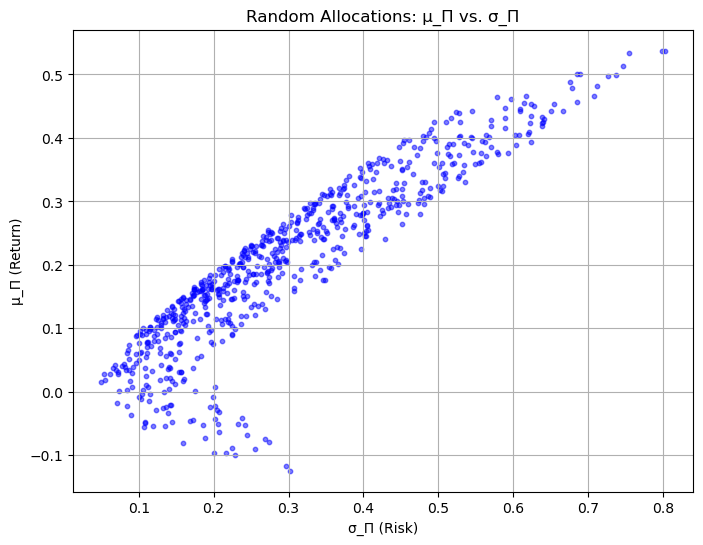

In [3]:
import matplotlib.pyplot as plt

# Set the number of random weight generations
N = 700

mu_list = []  # Store μ_Π for each portfolio
sigma_list = []  # Store σ_Π for each portfolio

# Generate random portfolio weights
# Method 2: Generate w1, w2, w3 first, then compute w4 = 1 - (w1+w2+w3)
# Allow w1, w2, w3 to be any random number in the range [-1,1] (negative weights allowed)
for _ in range(N):
    w1, w2, w3 = np.random.uniform(-1,1,3)  # Randomly generate weights in [-1,1]
    w4 = 1 - (w1 + w2 + w3)
    w = np.array([w1, w2, w3, w4])
    
    # Calculate μ_Π and σ_Π
    mu_p = w @ mu
    var_p = w @ Sigma @ w
    sigma_p = np.sqrt(var_p) if var_p >= 0 else 0.0  # Variance should theoretically not be negative; add check for safety
    
    mu_list.append(mu_p)
    sigma_list.append(sigma_p)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(sigma_list, mu_list, c='blue', alpha=0.5, s=10)
plt.title('Random Allocations: μ_Π vs. σ_Π')
plt.xlabel('σ_Π (Risk)')
plt.ylabel('μ_Π (Return)')
plt.grid(True)
plt.show()

**Observing the Shape and Interpretation:**

* These points will scatter across the risk-return plane, forming a "cloud" or a scatter distribution.

* Since the weights are random rather than precisely optimized, most points will not lie on the Efficient Frontier.

* The outer envelope of the point distribution (the "frontier" enclosing the set of points) has some correlation with the Efficient Frontier derived using the optimal method (1.1).

* This provides an intuitive understanding: random portfolios tend to be distributed within the interior of the risk-return space, whereas the optimal allocation derived through precise optimization appears on the "envelope boundary" of this point cloud distribution, highlighting the significance of optimization.